/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp


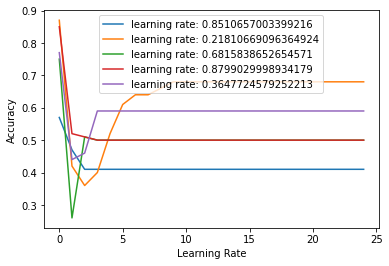

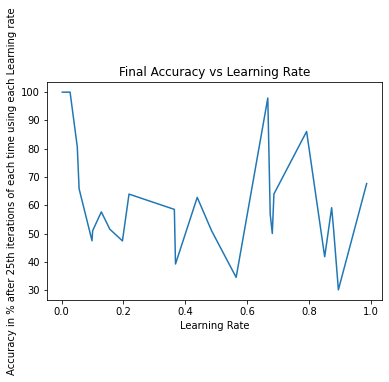

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
#Reading the datasets
x_train=np.loadtxt("/content/X_train.csv")
x_test=np.loadtxt("/content/X_test.csv")

#taking the label/output column and reshaping
y_test = np.loadtxt("/content/Y_test.csv")  
y_train = np.loadtxt("/content/Y_train.csv")
y=y_train.reshape(100, 1)
x=x_train

#Setting weight and biases w1,w2,b1,b2 and learning rate
number_of_neurons=5
W1=w1=np.random.rand(number_of_neurons,2)
B1=b1=np.random.rand(number_of_neurons,1)
W2=w2=np.random.rand(1,number_of_neurons)
B2=b2=np.random.rand(1,1)
learning_rate=1

learning_rate_range=np.random.uniform(0.001,1,25)#take 25 learning rates btw 0.001 and 1

#sigmoid functtion
def sigmoid (inp):
    return 1/(1+np.exp(-inp))

LIST=[]
DICT=dict()
for k in range (len(learning_rate_range)):
    LR=learning_rate_range[k]
    mse_list2=[]
    w1_list=[]
    w2_list=[]
    b1_list=[]
    b2_list=[]
    t11_list=[]
    w1=W1
    b1=B1
    w2=W2
    b2=B2
    for i in range (25):
        mse_list1=[]
        t1_list=[]
        t2_list=[]

        for j in range (100):
            #forward feed
            z1=np.dot(w1,x[j].reshape(2,1))+b1
            a1=sigmoid(z1)
            z2=np.dot(w2,a1)+b2
            a2=sigmoid(z2)
            #print(a2)
            aa=np.round(a2,0)

            if y[j]==aa or a2:
                t1_list.append(1)
            else:
                t2_list.append(1)

            #back Propagation
            dz2=a2-y[j].reshape(1,1)
            dw2=np.dot(dz2,a1.T)
            db2=dz2

            dz1=np.dot(w2.T,a2-y[j].reshape(1,1))*sigmoid(z1)*(1-sigmoid(z1))
            dw1=np.dot(dz1,x[j].reshape(2,1).T)
            db1=dz1
            #update rules
            w1=w1-LR*dw1
            b1=b1-LR*np.mean(db1)
            w2=w2-LR*dw2
            b2=b2-LR*np.mean(db2)
            #Calculating MSE
            mse= ((y[j]-a2)**2)
            mse_list1.append(mse)

        w1_list.append(w1)
        w2_list.append(w2)
        b1_list.append(b1)
        b2_list.append(b2)

        a=sum(mse_list1)/100
        mse_list2.append(a)
        b=(len(t1_list))/100
        t11_list.append(b)
    DICT[LR]=(sum(t11_list)/25)*100
    #Below things are just to show output in a better way
    if (k<=4):
        plt.plot(np.arange(25),t11_list)
        plt.xlabel("Learning Rate")
        plt.ylabel("Accuracy")
    if k==0:
        cc1=(LR)
        LIST.append(cc1)
    if k==1:
        cc2=(LR)
        LIST.append(cc2)
    if k==2:
        cc3=(LR)
        LIST.append(cc3)
    if k==3:
        cc4=(LR)
        LIST.append(cc4)
    if k==4:
        cc5=(LR)
        LIST.append(cc5)
        plt.legend(('learning rate: %s'%LIST[0],'learning rate: %s'%LIST[1],'learning rate: %s'%LIST[2],'learning rate: %s'%LIST[3],'learning rate: %s'%LIST[4] ))
    #print("Average Log-Loss on Train data: ",sum(log_loss_list2)/25)

plt.show()

L1=[]
L2=[]
a=sorted(DICT.items(), key=lambda item: item[0],reverse=False)

for i in a:
    for j in i:
        if j>1:
            L2.append(j)
        if j<=1:
            L1.append(j)
plt.title("Final Accuracy vs Learning Rate")
plt.ylabel("Accuracy in % after 25th iterations of each time using each Learning rate")
plt.xlabel("Learning Rate")
plt.plot(L1,L2)
plt.show()

